In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
    plt.style.use('dark_background')
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def img_processing(img):
    # do something here

    # 先將圖片轉為灰階
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # 將圖片做模糊化，可以降噪
    blur_img = cv2.medianBlur(img,5) 

    # 一般圖二值化(未模糊降噪)
    ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    # 一般圖自適應平均二值化(未模糊降噪)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

    # 一般圖自適應高斯二值化(未模糊降噪)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    # 一般圖二值化(有模糊降噪)
    ret, th4 = cv2.threshold(blur_img,127,255,cv2.THRESH_BINARY)

    # 一般圖算術平均法的自適應二值化(有模糊降噪)
    th5 = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

    # 一般圖高斯加權均值法自適應二值化(有模糊降噪)      
    th6 = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    
    titles = ['Thresholding (v = 127)', 'Adaptive Mean Threshold', 'Adaptive Gaussian Threshold',
              '(Blur image) Thresholding (v = 127)', '(Blur image) Adaptive Mean Threshold', '(Blur image) Adaptive Gaussian Threshold']
    images = [th1, th2, th3,
              th4, th5, th6]
    
    plt.figure(figsize=(15,10)) 
    for i in range(6):        
        plt.subplot(2,3,i+1)
        plt.imshow(images[i],'gray')
        plt.title(titles[i])
    
    plt.show()

origin picture:


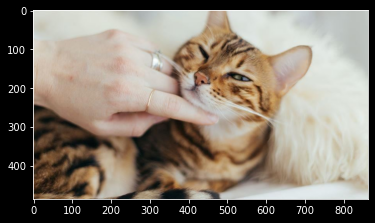

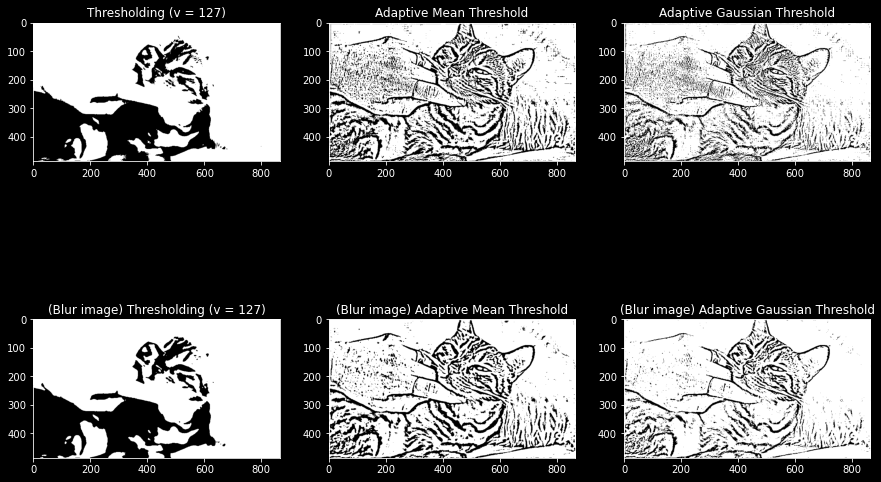

In [4]:
file_name = "./testdata/cat.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

img_processing(origin_img)


# Reference

https://blog.csdn.net/on2way/article/details/46812121

https://blog.csdn.net/weixin_40647819/article/details/90213858?utm_medium=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param

https://blog.csdn.net/qq_37385726/article/details/82017177

https://www.twblogs.net/a/5b8c1ba02b717718833082e1